# Introduction 

## Titanic Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### Questions
#### 1.How many survived?
#### 2.What was the survival rate by gender?
#### 3.What was the survival rate by class of ticket?
#### 4.What was the survival rate by age?

## Data Wrangling

In [53]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# Download programmatically titanic data
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59d54e6d_titanic-data/titanic-data.csv'
respnose=requests.get(url)
with open('titanic.csv','wb') as file:
    file.write(respnose.content)

In [55]:
data=pd.read_csv('titanic.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
sum(data.duplicated())

0

#### There is no duplicated row into the dataset

In [58]:
# make the Survived column meangingful by replace 1 to yes and 0 to no
data['Survived']=data.Survived.transform(lambda x: 'yes' if(x== 1) else 'no' )

### How many  survived? 

In [59]:
data['Survived'].value_counts() / len(data)

no     0.616162
yes    0.383838
Name: Survived, dtype: float64

Text(0.5,1,'survived')

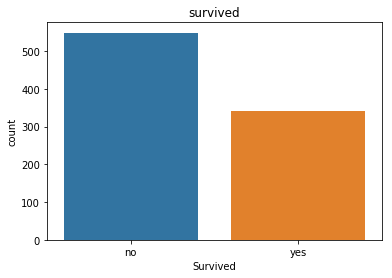

In [60]:
sns.countplot(x='Survived',data=data)
plt.title('survived')

#### the rate of survivors is 0.38 % of all passengers

### What was the survival rate by gender?

In [61]:
data[data['Survived']=='yes'].groupby('Sex').count() /len(data[data['Survived']=='yes'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,0.681287,0.681287,0.681287,0.681287,0.576023,0.681287,0.681287,0.681287,0.681287,0.266082,0.675439
male,0.318713,0.318713,0.318713,0.318713,0.271930,0.318713,0.318713,0.318713,0.318713,0.131579,0.318713


#### female survivors is 233 and male survivors is 109
#### the rate of female survivors is 0.68 % of all survivors

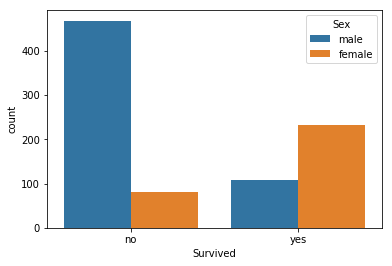

In [63]:
sns.countplot(x='Survived',data=data,hue='Sex')

### What was the survival rate by class of ticket? 

In [64]:
data[data['Survived']=='yes'].groupby('Pclass').count() /len(data[data['Survived']=='yes'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,0.397661,0.397661,0.397661,0.397661,0.356725,0.397661,0.397661,0.397661,0.397661,0.342105,0.391813
2,0.254386,0.254386,0.254386,0.254386,0.242690,0.254386,0.254386,0.254386,0.254386,0.038012,0.254386
3,0.347953,0.347953,0.347953,0.347953,0.248538,0.347953,0.347953,0.347953,0.347953,0.017544,0.347953


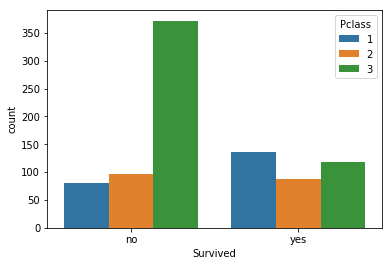

In [65]:
sns.countplot(x='Survived',data=data,hue='Pclass')

### What are the survival rates by age?

In [67]:
data[data['Survived']=='yes']['Age'].mean()

28.343689655172415

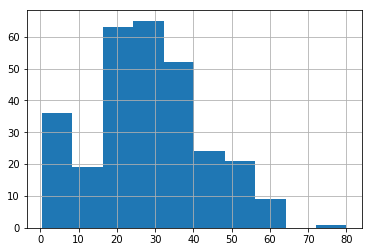

In [75]:
age=data[data['Survived']=='yes']['Age']
age.hist()

#### The averge age of the survivors is 28 year

# Conclusion 
Femle with first class ticket  most likely to survive.  the other side male with third class ticket  least  likely to survive 